<h1 style="fonte-size:3rem;color:orange; text-align: center;">Underwater Acoustic Ray Trace

<h2 style="fonte-size:3rem;color:black; text-align: center;">Initial context

<div align="justify">Arising from the "Determination the Depth" module of the Cat A - Hydrography & Oceanography (FIG-IHO-ICA) course, proposed the elaboration of a program for evaluation and aid to understanding refraction of acoustic rays that are transmitted by a source, in this case a transducer.
    To this end, it was proposed that the software present the path of the acoustic ray taking into account input parameters such as <b>height at which the transducer is located in relation to the water surface</b>, the <b>transducer transmission angles</b> and the <b>SVP's</b> acquired.
</div>

<h4 style="fonte-size:3rem;color:black; text-align: center;">Importing Libraries

In [1]:
#JOHNBARRETS RAY TRACE BY SNELL LAW
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

<h3 style="fonte-size:3rem;color:black; text-align: center;">First INPUT - SVP

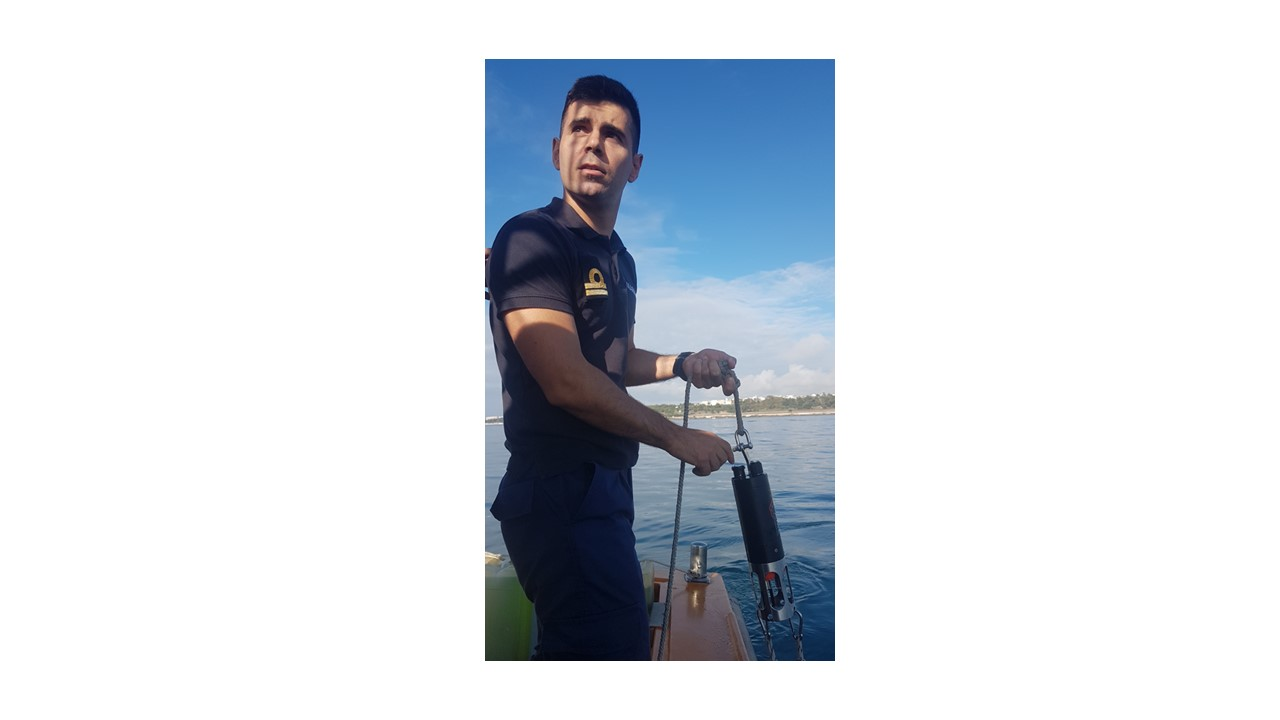

<h3 style="fonte-size:3rem;color:black; text-align: center;">Importing SVP files

<div align="justify">Establishing the path inside the computer, to find where the txt file with sound depths and speeds. Note that several files with text formats can be used.</div> 


In [2]:
vp = r"C:\Users\Utilizador\Desktop\HIDROGRAFIA_BARRETO\PROGRAMAS_PENDENTES_PYTHON\TRACADO_RAIO_SONORO\2_ANEXOS_APENDICES_AUXILIOS_PROGRAMA\FICHEIROS_SVP\svp0.txt"

<h4 style="fonte-size:3rem;color:black; text-align: center;">Reading the SVP file

<div align="justify"> The following way <b>svp = pd.read_csv(vp,sep=',')</b> serves to read the svp file in txt format, separating the elements of the file that are found with commas. 
The mode that is used in this code is in order to read files with KONGSBERG "asvp" format <b>svp = pd.read_csv(vp,sep=' ',skiprows=1,names=['z','spd'])</b> in which the data that are separated by empty spaces will be separated and the first line is deleted, and then it is defined that the columns of depth and velocity will be called "z" and "spd".
</div>

In [3]:
svp = pd.read_csv(vp,sep=',',skiprows=1,names=['z','spd'])

<h4 style="fonte-size:3rem;color:black; text-align: center;">File cleanup, because the data is already read.

In [4]:
del vp

<h3 style="fonte-size:3rem;color:black; text-align: center;">Initial Analysis

In [5]:
svpSPDMin = svp.spd.min()
svpSPDMax = svp.spd.max()

svpZMin = svp.z.min()
svpZMax = svp.z.max()

svpZSPDMin = np.where(svp.spd == svp.spd.min())[0]

svpZMinSPD = np.array([svpZSPDMin])[0][0]

svpmean = np.mean(svp.spd)

print('Initial analysis results')

print('Minimum sound speed - ' f" {svpSPDMin} " 'm/s')
print('Maximum sound speed - ' f" {svpSPDMax} " 'm/s')

print('Minimum depth - ' f" {svpZMin}" 'mts')
print('Maximum depth - ' f" {svpZMax}" 'mts')

print('Depth where the speed of sound is minimum - ' f"{svpZMinSPD} " 'mts')

print('Average speed of sound 'f"{np.round(svpmean,2)}" ' m/s for use in a single beam echo sounder')

Initial analysis results
Minimum sound speed -  1449 m/s
Maximum sound speed -  5100 m/s
Minimum depth -  0mts
Maximum depth -  100mts
Depth where the speed of sound is minimum - 0 mts
Average speed of sound 2780.68 m/s for use in a single beam echo sounder


<h3 style="fonte-size:3rem;color:black; text-align: center;">Additional INPUTS




<div align="justify"> The user will be able to put the following INPUT'S, height from the surface on which the transducer is located, as well as its angular aperture and the depth at which the bottom is located.
</div>

In [6]:
svpSensordepth = 0 
svpSensorsndSPD = svp.spd[svpSensordepth]
Bottom = 15
aptrang= 180

print('Transducer placed at 'f"{svpSensordepth}" ' mts depth with the speed of sound 'f"{svpSensorsndSPD}" 'm/s')
print('Transducer has an angular aperture of 'f"{aptrang}"' degrees')
print('Location with 'f"{Bottom}" ' mts deep')

aptrangfinal= int(aptrang/2)

aptranginitial = 0 #Optional, if you want it to be from 30 to 90 or from 20 to 40 degrees. Example;

anglTransm = np.deg2rad(np.arange(aptranginitial,aptrangfinal+1,1)) # In radians;
print('Transmission angles, 'f"{0}" ' degrees to 'f"{aptrangfinal}" ' degrees for each board')

Transducer placed at 0 mts depth with the speed of sound 1449m/s
Transducer has an angular aperture of 180 degrees
Location with 15 mts deep
Transmission angles, 0 degrees to 90 degrees for each board


<h2 style="fonte-size:3rem;color:black; text-align: center;">SOUND RAY TRACING - LEI DE SNELL

<div align="justify">The methodology used to describe the sound ray tracing, was exclusively with Snell's Law.
</div>

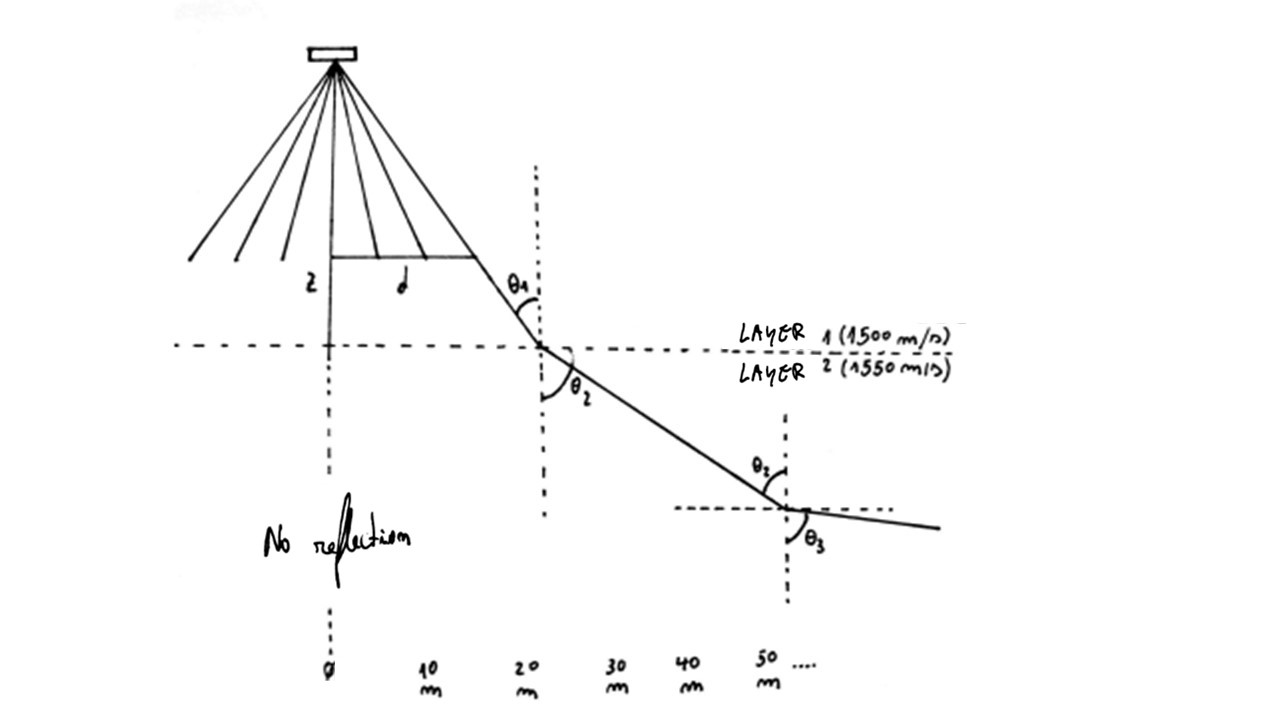

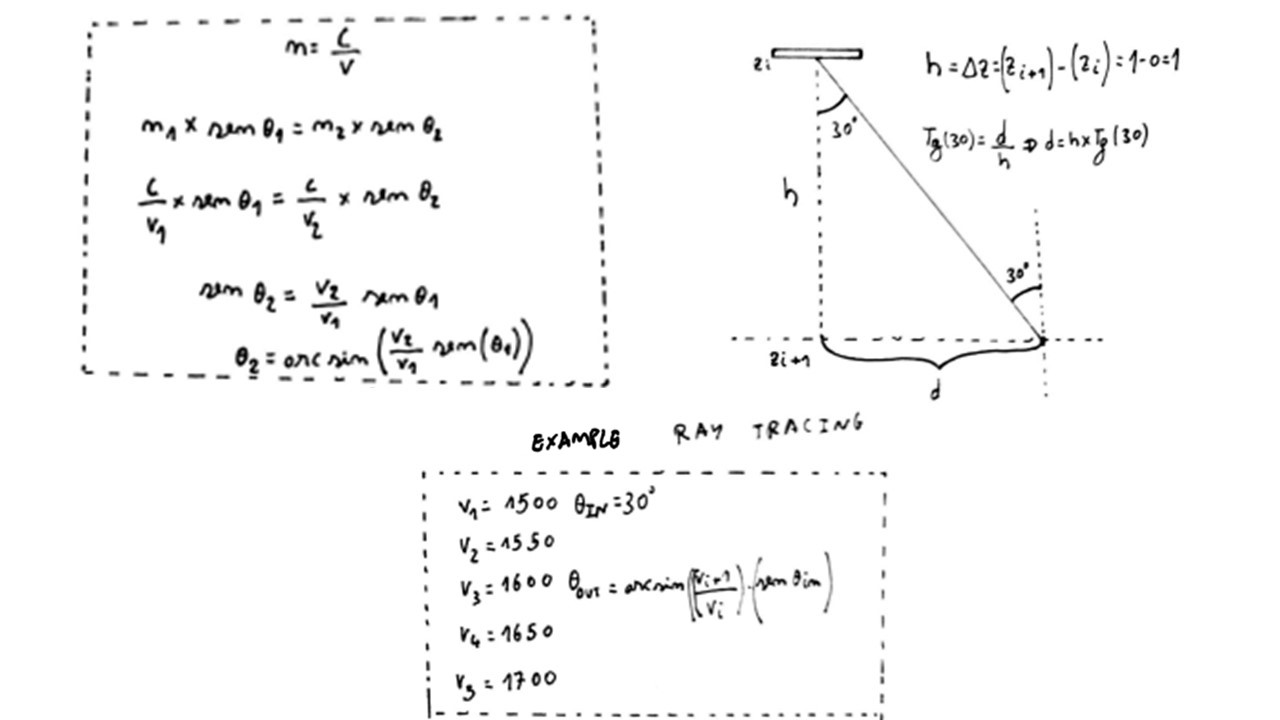

<div align="justify"> The program will run the angles from the initial angular aperture value <b>"aptranginitial"</b>, being zero in this case, and scroll to the final opening value <b>"aptrangfinal"</b>, that correspond the aperture transducer, or that aperture we define at the acquisition moment.
</div>

<div align="justify"> With the start cycle was created lists for save all angles. In case of distances there is to a list that save distances calculated, but in the first distance will have save like zero <b>"dist_list.append(0)"</b>, because the zero is the first step in the out of transducer e then the software have less one line. So, we have to save the value zero. Need to refer that this specific topic is visible inside the cycle.
</div>

<div align="justify">In the cycle of depths the lenght of array is the svp - 1 because the code will catch one more line in compare with the indice stipulated, No ciclo das profundidades o comprimento do array é o svp -1 porque o código vai buscar mais uma linha que o indice estipulated, and for that is need to delete one line.
    </div>

<div align="justify"> The <b>Calculation of angles</b> over the water column process like this way. Inside the cycle the software start with last angle saved ou first angle.
</div>

<div align="justify"> The is aplicated the Snell Law, that software will determine the out angle in wich layer.
</div>

<div align="justify">Calculation of acoustic ray distance is based in entrance angle and in the distance between wich layer of water column.
</div>

<div align="justify">For finish the cycle the software save the last distance and sum to the last distance e sum again to the sum of distances before. And Finally the cylce will save in list of angles the last out angle.
</div>

<div align="justify">The angle aperture of transducer is only represented by positive axys, example the angle aperture 180 degrees, show a trace starte in 0 degrees up to 90 degrees. Is necessary to mirror a negative axys for represent symmetrically, so that the angular opening for each edge is represented.
</div>

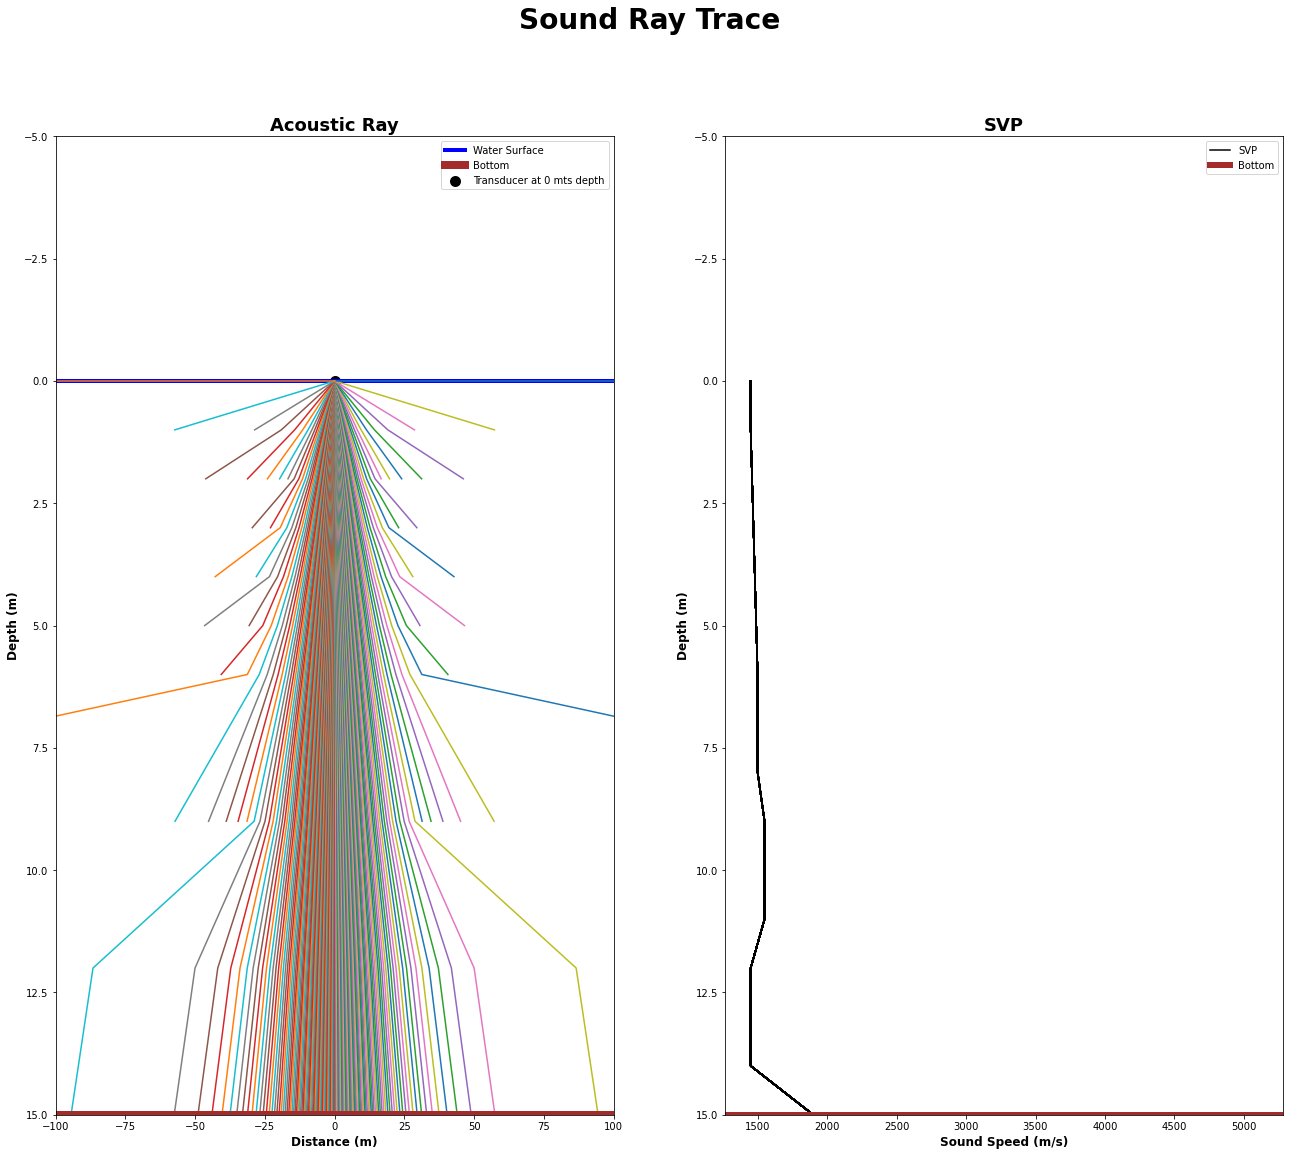

In [7]:
RayFigure = plt.figure(figsize=(22,18))

j = svpSensordepth

for i in range (len(anglTransm)):

    angles=[] ; angles.append(anglTransm[i])
    
    dist_list=[] ; dist_list.append(0)
    
    for j in range(len(svp)-1):
    
        anglentrance=angles[-1]
        
        angleout=np.arcsin((svp.spd.iloc[j+1]/svp.spd.iloc[j])*np.sin(anglentrance))

        dist=(svp.z.iloc[j+1]-svp.z.iloc[j])*(np.tan(anglentrance))

        dist_list.append(dist+dist_list[-1])
        
        angles.append(angleout)
        
    dist_list_neg = [ -x for x in dist_list]
    
    plt.subplot(1, 2, 1) #line 1, column 2, index 1 (firts graphic)
    
    if i==0 & j==0:###########
        plt.axhline(y=abs(0), label = 'Water Surface', color = 'blue',linewidth=4)
        plt.axhline(y=abs(Bottom),label = 'Bottom', color = 'brown',linewidth=8)
        plt.scatter(0,svpSensordepth, label = 'Transducer at ' f"{svpSensordepth}" ' mts depth',
                    color = 'black', linewidth=5)
    
    plt.plot(dist_list,svp.z)
    plt.plot(dist_list_neg,svp.z)
    plt.ylim(-5.0,Bottom)
    plt.xlim(-1*svp.z.iloc[-1],1*svp.z.iloc[-1])#Expression with right distances, in the theory the distances are too long.

    plt.gca().invert_yaxis()
    plt.axhline
    plt.axhline(y=abs(Bottom),color = 'brown',linewidth=8)
    plt.title('Acoustic Ray',fontweight='bold',fontsize=18)
    plt.xlabel('Distance (m)',fontweight='bold',fontsize=12)
    plt.ylabel('Depth (m)',fontweight='bold',fontsize=12)
    plt.legend()

    plt.subplot(1, 2, 2) #line 1, column 2, index 2 (second graphic)
    plt.plot(svp.spd, svp.z, color = 'black')
    plt.ylim(-5.0,Bottom)
    plt.gca().invert_yaxis()
    
    plt.axhline(y=abs(Bottom),color = 'brown',linewidth=6)
    
    
    plt.title('SVP',fontweight='bold',fontsize=18)
    plt.ylabel('Depth (m)',fontweight='bold',fontsize=12)
    plt.xlabel('Sound Speed (m/s)',fontweight='bold',fontsize=12)
    RayFigure.suptitle('Sound Ray Trace',fontweight='bold',fontsize=28)
    plt.legend(['SVP', 'Bottom'])
plt.show()


<h1 style="fonte-size:3rem;color:orange; text-align: center;">Graphics - Presentation of various scenarios

<h3 style="fonte-size:3rem;color:orange; text-align: center;">Scenario - 1 - Real SVP

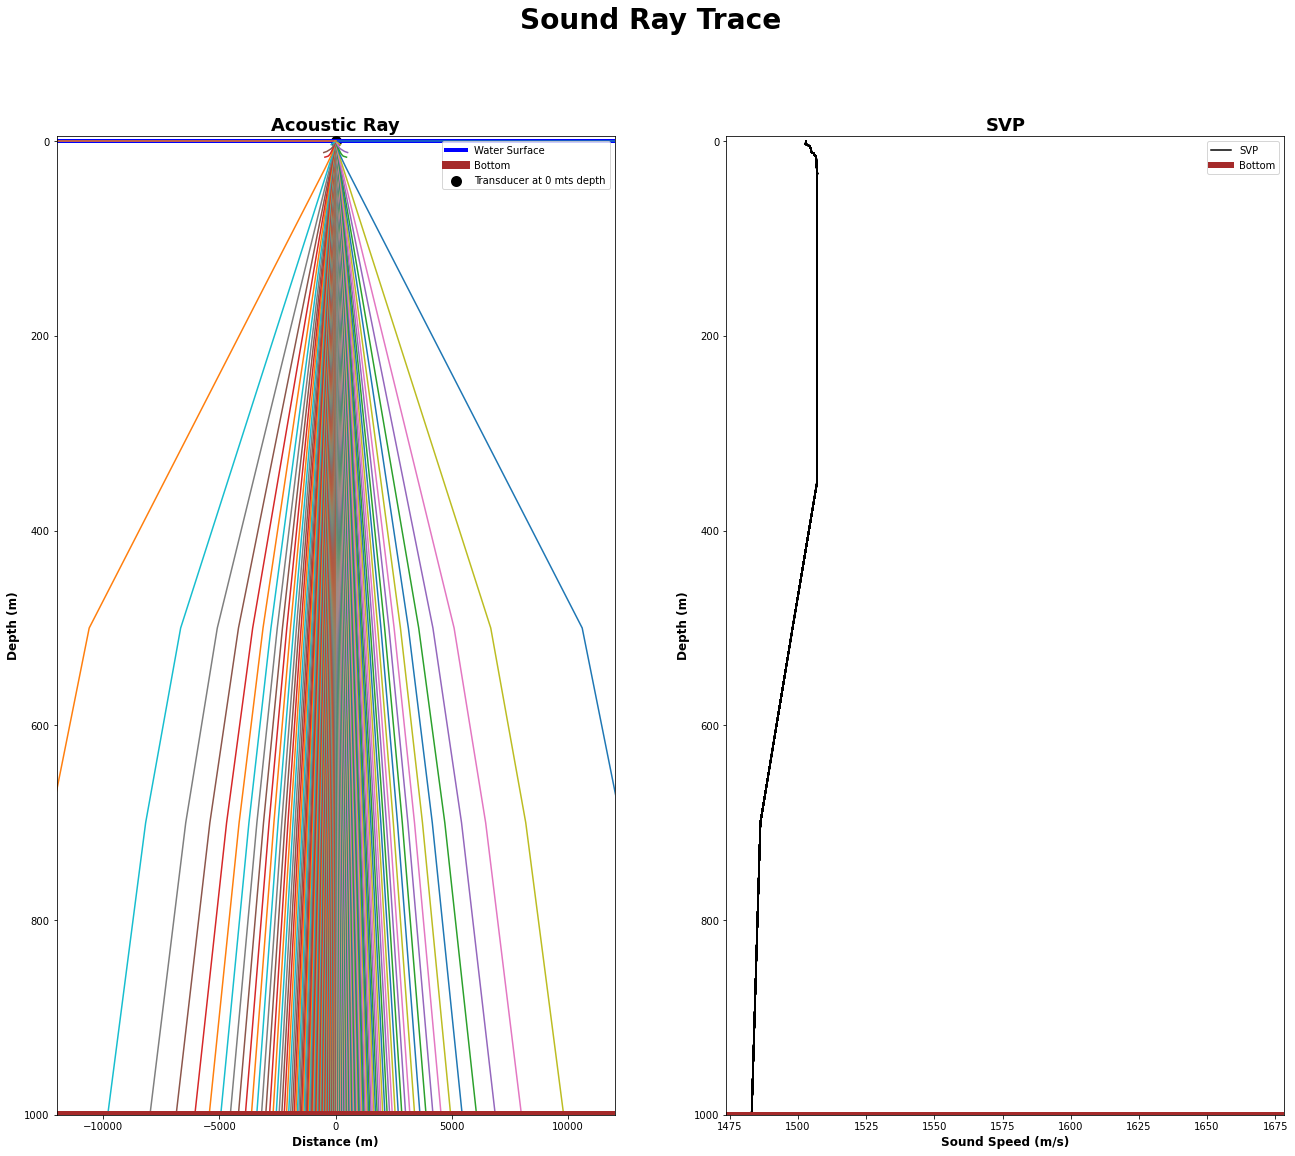

<h3 style="fonte-size:3rem;color:orange; text-align: center;">Scenario - 2 - Real SVP

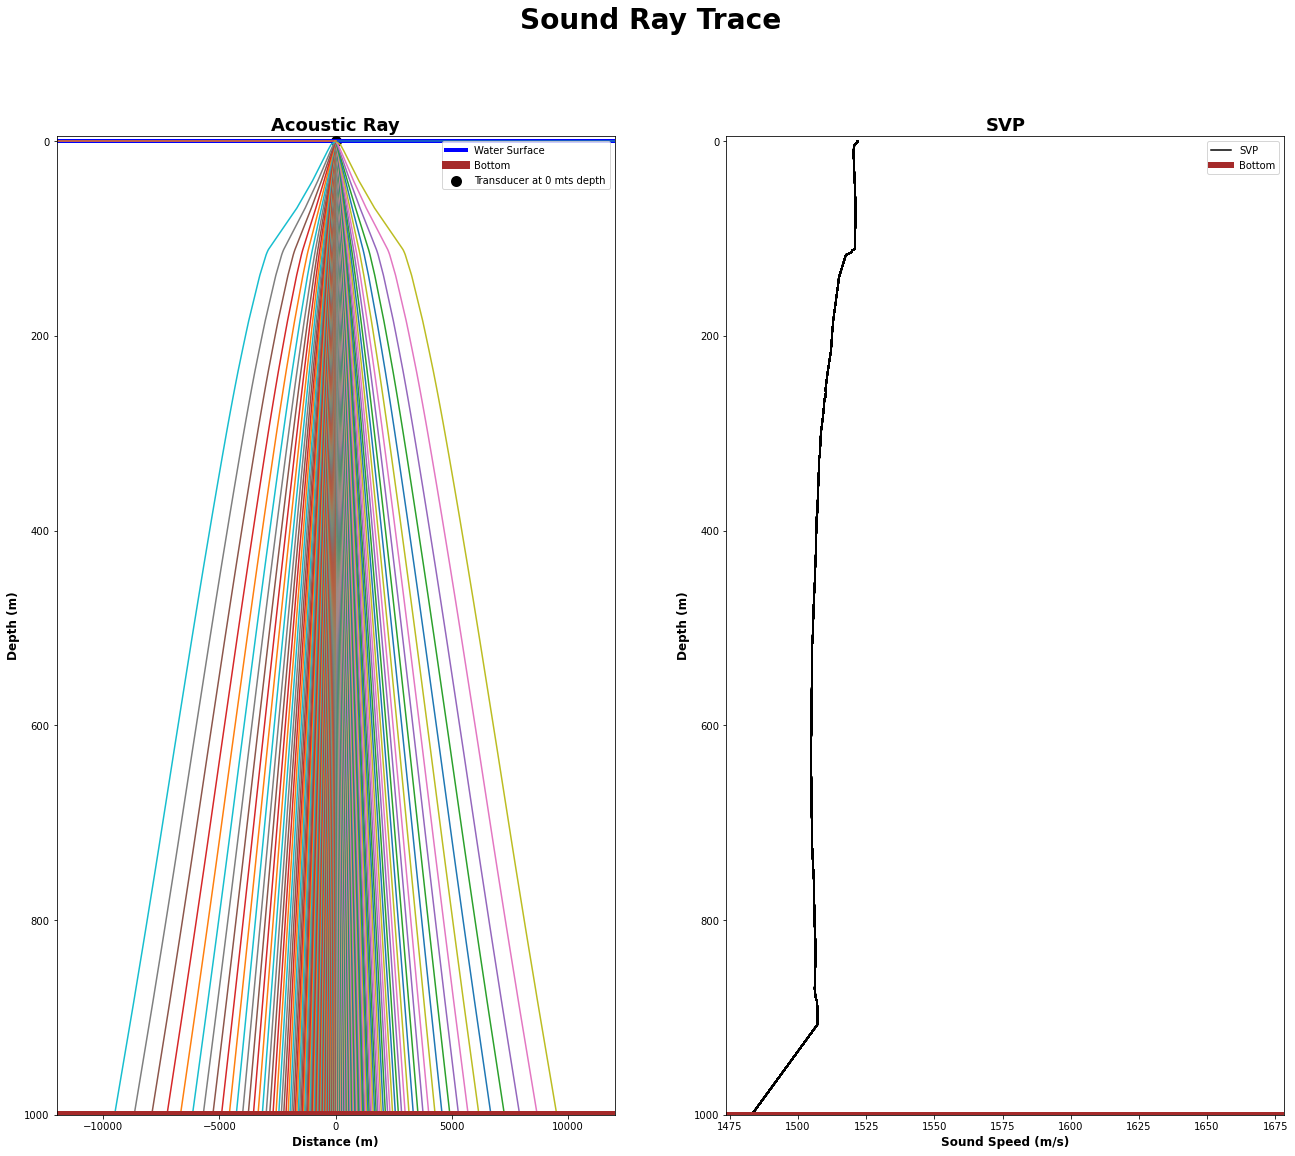

<h3 style="fonte-size:3rem;color:orange; text-align: center;">Scenario - 3 - Simulated SVP

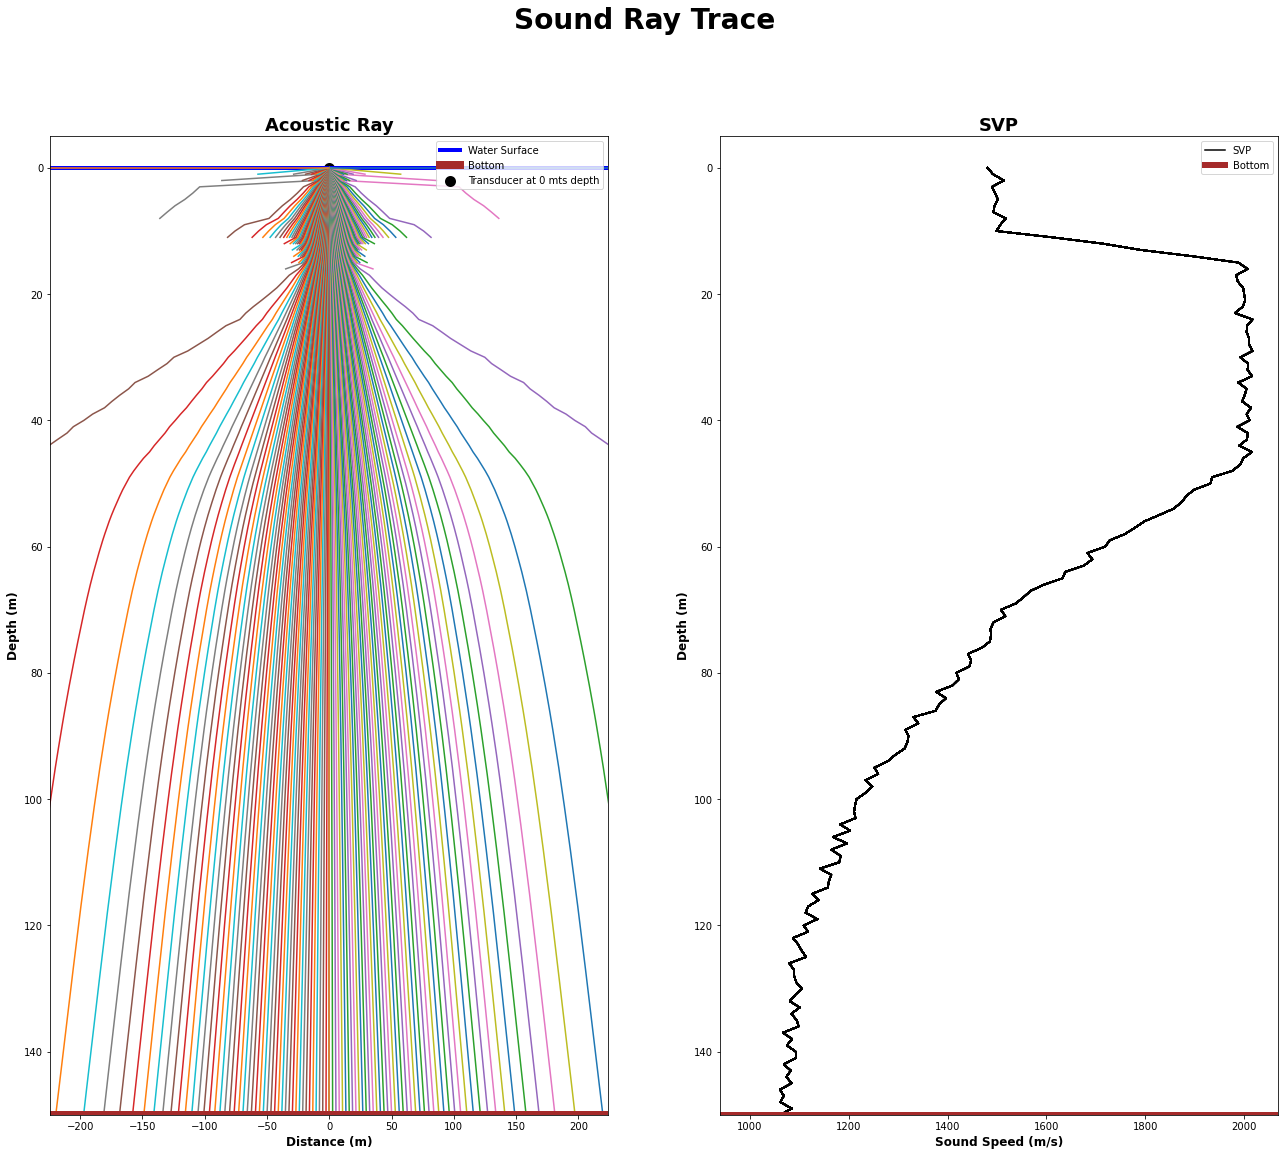

<h3 style="fonte-size:3rem;color:orange; text-align: center;">Scenario - 4 - Simulated SVP

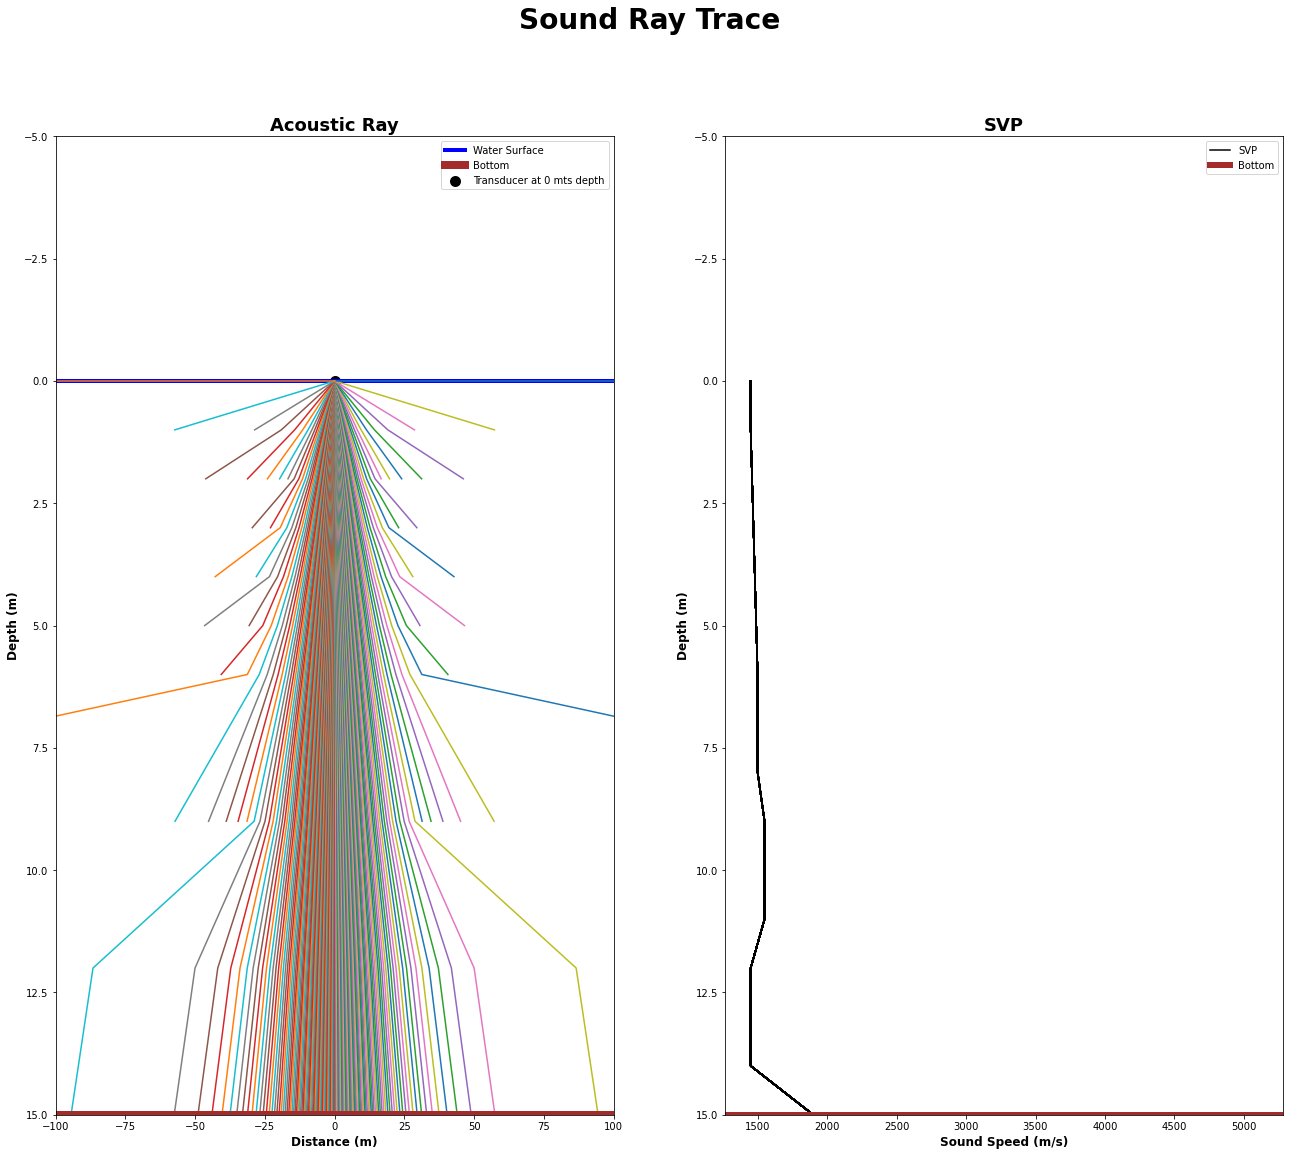